In [1]:
import pandas as pd
from sklearn import preprocessing, decomposition
import scipy.stats as stats 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


# 1

In [2]:
social_network_ads = pd.read_csv('file/Social_Network_Ads.csv')
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
def my_zscores(values):
    mean = sum(values) / len(values)
    differences = [(value - mean)**2 for value in values]
    sum_of_differences = sum(differences)
    standard_deviation = (sum_of_differences / (len(values) - 1)) ** 0.5

    zscores = [(value - mean) / standard_deviation for value in values]
    return zscores

In [4]:
social_network_ads['MZ Age'] = my_zscores(social_network_ads['Age'])
social_network_ads['scipyZ Age'] = stats.zscore(social_network_ads['Age'])
social_network_ads['sklearnZ Age'] = preprocessing.StandardScaler().fit(social_network_ads[['Age']]).transform(social_network_ads[['Age']])

social_network_ads['MZ ESalary'] = my_zscores(social_network_ads['EstimatedSalary'])
social_network_ads['scipyZ ESalary'] = stats.zscore(social_network_ads['EstimatedSalary'])
social_network_ads['sklearnZ ESalary'] = preprocessing.StandardScaler().fit(social_network_ads[['EstimatedSalary']]).transform(social_network_ads[['EstimatedSalary']])
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,MZ Age,scipyZ Age,sklearnZ Age,MZ ESalary,scipyZ ESalary,sklearnZ ESalary
0,15624510,Male,19,19000,0,-1.779569,-1.781797,-1.781797,-1.488183,-1.490046,-1.490046
1,15810944,Male,35,20000,0,-0.253270,-0.253587,-0.253587,-1.458854,-1.460681,-1.460681
2,15668575,Female,26,43000,0,-1.111813,-1.113206,-1.113206,-0.784307,-0.785290,-0.785290
3,15603246,Female,27,57000,0,-1.016419,-1.017692,-1.017692,-0.373714,-0.374182,-0.374182
4,15804002,Male,19,76000,0,-1.779569,-1.781797,-1.781797,0.183521,0.183751,0.183751
5,15728773,Male,27,58000,0,-1.016419,-1.017692,-1.017692,-0.344386,-0.344817,-0.344817
6,15598044,Female,27,84000,0,-1.016419,-1.017692,-1.017692,0.418146,0.418669,0.418669
7,15694829,Female,32,150000,1,-0.539451,-0.540127,-0.540127,2.353802,2.356750,2.356750
8,15600575,Male,25,33000,0,-1.207207,-1.208719,-1.208719,-1.077589,-1.078938,-1.078938
9,15727311,Female,35,65000,0,-0.253270,-0.253587,-0.253587,-0.139089,-0.139263,-0.139263


In [5]:
social_network_ads[['Age','EstimatedSalary']].apply(stats.zscore)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [6]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,10))
minmax_scaler.fit(social_network_ads[['Age','EstimatedSalary']])
social_network_ads[['AgeMMS','ESalary MMS']] = minmax_scaler.transform(social_network_ads[['Age','EstimatedSalary']])
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,MZ Age,scipyZ Age,sklearnZ Age,MZ ESalary,scipyZ ESalary,sklearnZ ESalary,AgeMMS,ESalary MMS
0,15624510,Male,19,19000,0,-1.779569,-1.781797,-1.781797,-1.488183,-1.490046,-1.490046,0.238095,0.296296
1,15810944,Male,35,20000,0,-0.253270,-0.253587,-0.253587,-1.458854,-1.460681,-1.460681,4.047619,0.370370
2,15668575,Female,26,43000,0,-1.111813,-1.113206,-1.113206,-0.784307,-0.785290,-0.785290,1.904762,2.074074
3,15603246,Female,27,57000,0,-1.016419,-1.017692,-1.017692,-0.373714,-0.374182,-0.374182,2.142857,3.111111
4,15804002,Male,19,76000,0,-1.779569,-1.781797,-1.781797,0.183521,0.183751,0.183751,0.238095,4.518519
5,15728773,Male,27,58000,0,-1.016419,-1.017692,-1.017692,-0.344386,-0.344817,-0.344817,2.142857,3.185185
6,15598044,Female,27,84000,0,-1.016419,-1.017692,-1.017692,0.418146,0.418669,0.418669,2.142857,5.111111
7,15694829,Female,32,150000,1,-0.539451,-0.540127,-0.540127,2.353802,2.356750,2.356750,3.333333,10.000000
8,15600575,Male,25,33000,0,-1.207207,-1.208719,-1.208719,-1.077589,-1.078938,-1.078938,1.666667,1.333333
9,15727311,Female,35,65000,0,-0.253270,-0.253587,-0.253587,-0.139089,-0.139263,-0.139263,4.047619,3.703704


In [7]:
X = social_network_ads[['Age','EstimatedSalary']]
transformer = preprocessing.RobustScaler(quantile_range=(25,75)).fit(X)
transformer
social_network_ads[['Age Robust','ESalary Robust']] = transformer.transform(X)
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,MZ Age,scipyZ Age,sklearnZ Age,MZ ESalary,scipyZ ESalary,sklearnZ ESalary,AgeMMS,ESalary MMS,Age Robust,ESalary Robust
0,15624510,Male,19,19000,0,-1.779569,-1.781797,-1.781797,-1.488183,-1.490046,-1.490046,0.238095,0.296296,-1.107692,-1.133333
1,15810944,Male,35,20000,0,-0.253270,-0.253587,-0.253587,-1.458854,-1.460681,-1.460681,4.047619,0.370370,-0.123077,-1.111111
2,15668575,Female,26,43000,0,-1.111813,-1.113206,-1.113206,-0.784307,-0.785290,-0.785290,1.904762,2.074074,-0.676923,-0.600000
3,15603246,Female,27,57000,0,-1.016419,-1.017692,-1.017692,-0.373714,-0.374182,-0.374182,2.142857,3.111111,-0.615385,-0.288889
4,15804002,Male,19,76000,0,-1.779569,-1.781797,-1.781797,0.183521,0.183751,0.183751,0.238095,4.518519,-1.107692,0.133333
5,15728773,Male,27,58000,0,-1.016419,-1.017692,-1.017692,-0.344386,-0.344817,-0.344817,2.142857,3.185185,-0.615385,-0.266667
6,15598044,Female,27,84000,0,-1.016419,-1.017692,-1.017692,0.418146,0.418669,0.418669,2.142857,5.111111,-0.615385,0.311111
7,15694829,Female,32,150000,1,-0.539451,-0.540127,-0.540127,2.353802,2.356750,2.356750,3.333333,10.000000,-0.307692,1.777778
8,15600575,Male,25,33000,0,-1.207207,-1.208719,-1.208719,-1.077589,-1.078938,-1.078938,1.666667,1.333333,-0.738462,-0.822222
9,15727311,Female,35,65000,0,-0.253270,-0.253587,-0.253587,-0.139089,-0.139263,-0.139263,4.047619,3.703704,-0.123077,-0.111111


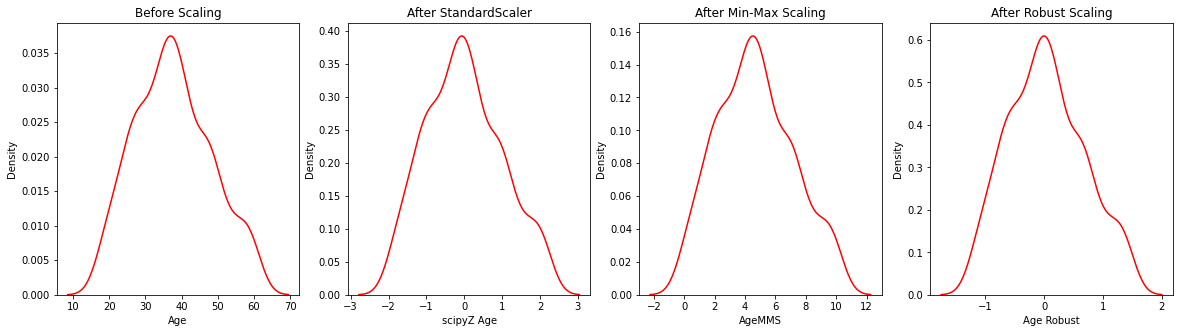

In [8]:
fig, (ax0,ax1, ax2, ax3) = plt.subplots(ncols = 4, figsize =(20, 5))
params = {"text.color" : "yellow",
          "xtick.color" : "crimson",
          "ytick.color" : "crimson"}
plt.rcParams.update(params)
ax0.set_title('Before Scaling')
sns.kdeplot(social_network_ads['Age'], ax = ax0, color ='r')
# sns.kdeplot(social_network_ads['EstimatedSalary'], ax = ax0, color ='b')

ax1.set_title('After StandardScaler')
sns.kdeplot(social_network_ads['scipyZ Age'], ax = ax1, color ='r')
# sns.kdeplot(social_network_ads['scipyZ ESalary'], ax = ax1, color ='b')

ax2.set_title('After Min-Max Scaling') 
sns.kdeplot(social_network_ads['AgeMMS'], ax = ax2, color ='r')
# sns.kdeplot(social_network_ads['ESalary MMS'], ax = ax2, color ='b')


ax3.set_title('After Robust Scaling')
sns.kdeplot(social_network_ads['Age Robust'], ax = ax3, color ='r')


plt.show()

In [9]:
# sns.kdeplot(social_network_ads['ESalary Robust'], ax = ax3, color ='b')

# XX = social_network_ads[['Age Robust']]
# minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,10)).fit(XX)
# social_network_ads[['Age MMS New']] = minmax_scaler.transform(XX)
# social_network_ads.head(10)

# ax4.set_title('After Min-Max Scaling on Robust Scaling')
# sns.kdeplot(social_network_ads['Age MMS New'], ax = ax4, color ='r')
# sns.kdeplot(social_network_ads['ESalary MMS New'], ax = ax4, color ='b')

In [10]:
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(social_network_ads[['Gender']])

one_hot_cols = encoder.get_feature_names(['G'])
ont_hot_value = encoder.transform(social_network_ads[['Gender']]).toarray()

normal_col = encoder.feature_names_in_
normal_value = encoder.inverse_transform(ont_hot_value)

df = pd.DataFrame(columns=one_hot_cols,data=ont_hot_value)
social_network_ads = pd.concat([social_network_ads,df],axis=1)
# social_network_ads = social_network_ads.drop(columns=normal_col)

social_network_ads.head(10)

C:\Users\Cena\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,User ID,Gender,Age,EstimatedSalary,Purchased,MZ Age,scipyZ Age,sklearnZ Age,MZ ESalary,scipyZ ESalary,sklearnZ ESalary,AgeMMS,ESalary MMS,Age Robust,ESalary Robust,G_Female,G_Male
0,15624510,Male,19,19000,0,-1.779569,-1.781797,-1.781797,-1.488183,-1.490046,-1.490046,0.238095,0.296296,-1.107692,-1.133333,0.0,1.0
1,15810944,Male,35,20000,0,-0.253270,-0.253587,-0.253587,-1.458854,-1.460681,-1.460681,4.047619,0.370370,-0.123077,-1.111111,0.0,1.0
2,15668575,Female,26,43000,0,-1.111813,-1.113206,-1.113206,-0.784307,-0.785290,-0.785290,1.904762,2.074074,-0.676923,-0.600000,1.0,0.0
3,15603246,Female,27,57000,0,-1.016419,-1.017692,-1.017692,-0.373714,-0.374182,-0.374182,2.142857,3.111111,-0.615385,-0.288889,1.0,0.0
4,15804002,Male,19,76000,0,-1.779569,-1.781797,-1.781797,0.183521,0.183751,0.183751,0.238095,4.518519,-1.107692,0.133333,0.0,1.0
5,15728773,Male,27,58000,0,-1.016419,-1.017692,-1.017692,-0.344386,-0.344817,-0.344817,2.142857,3.185185,-0.615385,-0.266667,0.0,1.0
6,15598044,Female,27,84000,0,-1.016419,-1.017692,-1.017692,0.418146,0.418669,0.418669,2.142857,5.111111,-0.615385,0.311111,1.0,0.0
7,15694829,Female,32,150000,1,-0.539451,-0.540127,-0.540127,2.353802,2.356750,2.356750,3.333333,10.000000,-0.307692,1.777778,1.0,0.0
8,15600575,Male,25,33000,0,-1.207207,-1.208719,-1.208719,-1.077589,-1.078938,-1.078938,1.666667,1.333333,-0.738462,-0.822222,0.0,1.0
9,15727311,Female,35,65000,0,-0.253270,-0.253587,-0.253587,-0.139089,-0.139263,-0.139263,4.047619,3.703704,-0.123077,-0.111111,1.0,0.0


In [11]:
df = pd.DataFrame(columns=normal_col,data=normal_value)
social_network_ads = pd.concat([social_network_ads,df],axis=1)

social_network_ads = social_network_ads.drop(columns=one_hot_cols)
social_network_ads.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased,MZ Age,scipyZ Age,sklearnZ Age,MZ ESalary,scipyZ ESalary,sklearnZ ESalary,AgeMMS,ESalary MMS,Age Robust,ESalary Robust,Gender
0,15624510,Male,19,19000,0,-1.779569,-1.781797,-1.781797,-1.488183,-1.490046,-1.490046,0.238095,0.296296,-1.107692,-1.133333,Male
1,15810944,Male,35,20000,0,-0.253270,-0.253587,-0.253587,-1.458854,-1.460681,-1.460681,4.047619,0.370370,-0.123077,-1.111111,Male
2,15668575,Female,26,43000,0,-1.111813,-1.113206,-1.113206,-0.784307,-0.785290,-0.785290,1.904762,2.074074,-0.676923,-0.600000,Female
3,15603246,Female,27,57000,0,-1.016419,-1.017692,-1.017692,-0.373714,-0.374182,-0.374182,2.142857,3.111111,-0.615385,-0.288889,Female
4,15804002,Male,19,76000,0,-1.779569,-1.781797,-1.781797,0.183521,0.183751,0.183751,0.238095,4.518519,-1.107692,0.133333,Male
5,15728773,Male,27,58000,0,-1.016419,-1.017692,-1.017692,-0.344386,-0.344817,-0.344817,2.142857,3.185185,-0.615385,-0.266667,Male
6,15598044,Female,27,84000,0,-1.016419,-1.017692,-1.017692,0.418146,0.418669,0.418669,2.142857,5.111111,-0.615385,0.311111,Female
7,15694829,Female,32,150000,1,-0.539451,-0.540127,-0.540127,2.353802,2.356750,2.356750,3.333333,10.000000,-0.307692,1.777778,Female
8,15600575,Male,25,33000,0,-1.207207,-1.208719,-1.208719,-1.077589,-1.078938,-1.078938,1.666667,1.333333,-0.738462,-0.822222,Male
9,15727311,Female,35,65000,0,-0.253270,-0.253587,-0.253587,-0.139089,-0.139263,-0.139263,4.047619,3.703704,-0.123077,-0.111111,Female


# Question 2

In [12]:
mall_customers = pd.read_csv('file/Mall_Customers.csv')
# mall_customers[['Age','Annual Income (k$)','Spending Score (1-100)']] = mall_customers[['Age','Annual Income (k$)','Spending Score (1-100)']].apply(stats.zscore)
mall_customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder.fit(mall_customers[['Gender']])

one_hot_cols = encoder.get_feature_names(['G'])
ont_hot_value = encoder.transform(mall_customers[['Gender']]).toarray()

normal_col = encoder.feature_names_in_
normal_value = encoder.inverse_transform(ont_hot_value)

df = pd.DataFrame(columns=one_hot_cols,data=ont_hot_value)
mall_customers_new = pd.concat([mall_customers,df],axis=1)
mall_customers_new = mall_customers_new.drop(columns=normal_col)

mall_customers_new.head(10)

C:\Users\Cena\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),G_Female,G_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
5,6,22,17,76,1.0,0.0
6,7,35,18,6,1.0,0.0
7,8,23,18,94,1.0,0.0
8,9,64,19,3,0.0,1.0
9,10,30,19,72,1.0,0.0


In [14]:
# X = mall_customers_new[['Age','Annual Income (k$)','Spending Score (1-100)','G_Female', 'G_Male']].apply(stats.zscore)
X = mall_customers_new[['Age',
    'Annual Income (k$)',
    # 'Spending Score (1-100)'
    ]].apply(stats.zscore)
pca = decomposition.PCA(n_components=2)
transfered = pca.fit_transform(X)
pca.explained_variance_ratio_
# transfered = X

array([0.50619902, 0.49380098])

In [15]:
transfered


array([[ 2.22335870e-01,  2.23698037e+00],
       [ 3.23829296e-01,  2.13548695e+00],
       [ 2.46092721e-01,  2.15924380e+00],
       [ 3.98332860e-01,  2.00700366e+00],
       [ 7.77316701e-01,  1.57404009e+00],
       [ 3.20596285e-01,  2.03076051e+00],
       [ 9.53313691e-01,  1.34406338e+00],
       [ 3.44353135e-01,  1.95302394e+00],
       [ 2.39797850e+00, -1.54581157e-01],
       [ 6.72590264e-01,  1.57080708e+00],
       [ 2.55021864e+00, -3.06821296e-01],
       [ 9.26323828e-01,  1.31707352e+00],
       [ 2.06650836e+00,  1.22909258e-01],
       [ 3.41120124e-01,  1.84829750e+00],
       [ 1.00082739e+00,  1.18859023e+00],
       [ 2.39626698e-01,  1.94979092e+00],
       [ 8.72344104e-01,  1.26309379e+00],
       [ 1.11143410e-01,  2.02429449e+00],
       [ 1.68105850e+00,  3.46419949e-01],
       [ 8.18364379e-01,  1.20911407e+00],
       [ 7.91374517e-01,  1.18212421e+00],
       [ 2.83907388e-01,  1.68959134e+00],
       [ 1.32259850e+00,  5.96920502e-01],
       [ 5.

NameError: name 'zs' is not defined

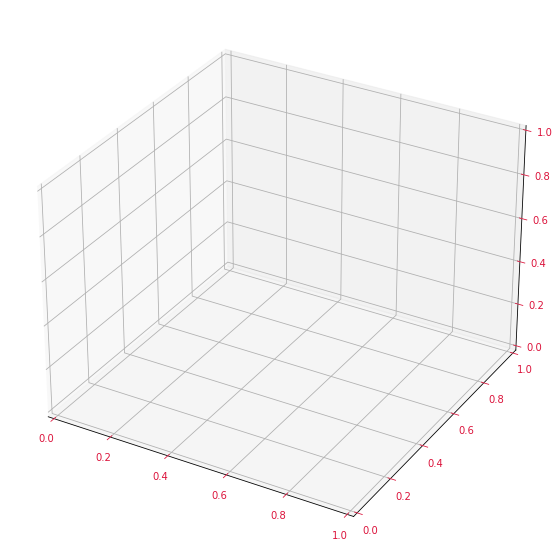

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

xs = transfered[:,0]
ys = transfered[:,1]
# zs = transfered[:,2]

# xs = transfered['Age']
# ys = transfered['Annual Income (k$)']
# zs = transfered['Spending Score (1-100)']
# zs = [0] * len(transfered['Age'])

ax.scatter(xs, ys, zs, marker='*')

ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')

plt.show()

In [ ]:
def scatter_hist1(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

4.315289240601385
5.0624321182699035


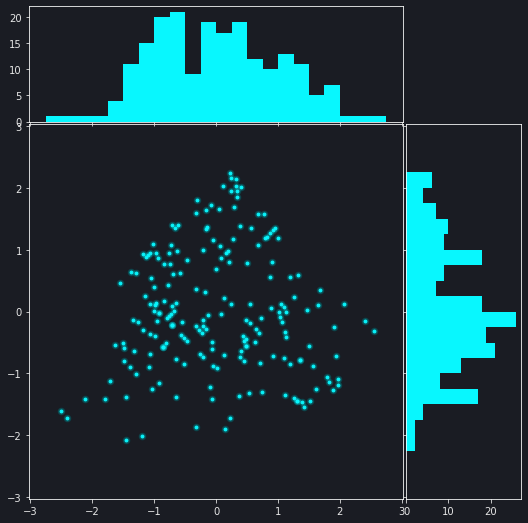

In [ ]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
# x = transfered[:,0]
# y = transfered[:,1]
zero = [0] * len(xs)
# xs=zero
# ys=zero

print(max(ys) - min(ys))
print(max(xs) - min(xs))
scatter_hist(xs, ys, ax, ax_histx, ax_histy)

plt.show()

In [ ]:
df = pd.DataFrame(columns=normal_col,data=normal_value)

mall_customers = pd.concat([mall_customers_new,df],axis=1)

mall_customers = mall_customers.drop(columns=one_hot_cols)
mall_customers.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,-1.424569,-1.738999,-0.434801,Male
1,2,-1.281035,-1.738999,1.195704,Male
2,3,-1.352802,-1.700830,-1.715913,Female
3,4,-1.137502,-1.700830,1.040418,Female
4,5,-0.563369,-1.662660,-0.395980,Female
5,6,-1.209269,-1.662660,1.001596,Female
6,7,-0.276302,-1.624491,-1.715913,Female
7,8,-1.137502,-1.624491,1.700384,Female
8,9,1.804932,-1.586321,-1.832378,Male
9,10,-0.635135,-1.586321,0.846310,Female


In [ ]:
plt.style.use("dark_background")
for pdram in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[pdram] = '0.9'  # very light grey
for pdram in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[pdram] = '#1a1c23'  # bluish dark grey

In [ ]:
arr = np.array([25,26,25,25,24,23,23,19,25,23,19,24,
27,21,23,24,27,26,14,25,17,16,24,26,
24,25,22,22,20,22,18,21,21,25,23,23,
24,28,25,26,24,27,20,22,25,22,17,15,
18,23
])
arr.sort()
len(arr)
arr

array([14, 15, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 22,
       22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 25,
       25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 28])

In [ ]:
from collections import Counter
d = Counter(arr)
for k,v in d.items():
    print(k,v)

14 1
15 1
16 1
17 2
18 2
19 2
20 2
21 3
22 5
23 7
24 7
25 9
26 4
27 3
28 1


In [ ]:
from statistics import quantiles
arr = np.array([
    12.5,1.,5.8,15,1.5,-2.5,
    -5.5,11.8,12.7,8.9,2.2,4.8,
    3.7,21.2,18.4,10.1,-9.6,19.6,
    13.8,5,4.3,7.3,-4.3,5.1,
    24.6,-1.1,4.3,5.8,10,12.7,
    14.5,5.5,5.9,16.6
])
arr.sort()
display(arr)
quantiles(arr,n=7)

array([-9.6, -5.5, -4.3, -2.5, -1.1,  1. ,  1.5,  2.2,  3.7,  4.3,  4.3,
        4.8,  5. ,  5.1,  5.5,  5.8,  5.8,  5.9,  7.3,  8.9, 10. , 10.1,
       11.8, 12.5, 12.7, 12.7, 13.8, 14.5, 15. , 16.6, 18.4, 19.6, 21.2,
       24.6])

[-1.1, 4.3, 5.5, 8.9, 12.7, 16.6]

In [ ]:
print(f'({245/432} * {15/14} *{20/21})**1/3')
print(f'{(245/432 * 15/14 *20/21)**(1/3)}')
x1= 245/432
x2=15/14
x3=20/21
1/3


(0.5671296296296297 * 1.0714285714285714 *0.9523809523809523)**1/3
0.8333333333333334


0.3333333333333333